In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


In [9]:

with open('/scratch/sg7729/hpml_project/PD-GAN/PD-GAN/optimization/measurements/a100lists_PDGAN_MP_loss.pkl','rb') as f:
    lists1=pickle.load(f)

with open('/scratch/sg7729/hpml_project/PD-GAN/PD-GAN/optimization/measurements/a100lists_PDGAN_loss.pkl','rb') as f:
    lists2=pickle.load(f)

In [21]:
rfmp=lists1[6]
rfsp=lists2[6]

In [ ]:
def roofline_model(x, peak_perf, mem_bandwidth):
    return np.minimum(peak_perf, mem_bandwidth * x)

In [ ]:
# Define roofline model parameters
peak_perf =  19500 # Maximum achievable performance in FLOPs per second
mem_bandwidth = 1600 # Memory bandwidth in GB/s

# Define performance and arithmetic intensity ranges
perf_range = np.linspace(0, peak_perf, 100)
ai_range = perf_range / mem_bandwidth

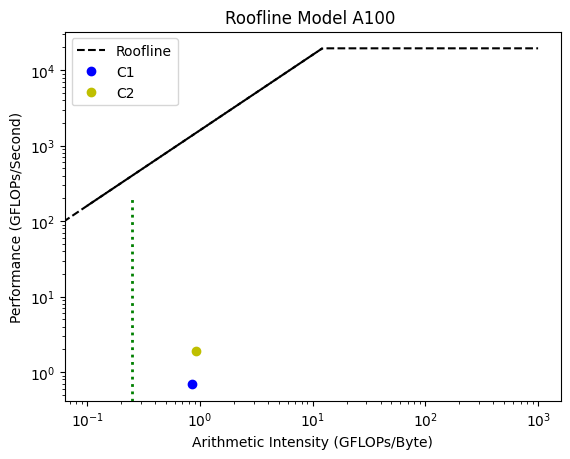

In [24]:

# Generate the data points for the roofline model
x_roof = np.arange(0.1, 1000)
y_roof = np.minimum(peak_perf, mem_bandwidth * x_roof)

# Plot the roofline model
plt.loglog(x_roof, y_roof, color='black', linestyle='--')

# Plot roofline model
plt.plot(ai_range, perf_range, 'k--', label='Roofline')
plt.xlabel('Arithmetic Intensity (GFLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/Second)')
plt.title('Roofline Model A100 ')

# Define benchmark data
benchmarks = [('C1',rfsp[0],rfsp[1]),('C2',rfmp[0],rfmp[1])]

# Plot benchmark points
colors = ['bo','yo']
for i, (label, bw, perf) in enumerate(benchmarks):
    # Check if point overlaps with previous points
    ai = perf/bw
    overlap = False
    for j in range(i):
        if abs(ai - benchmarks[j][2]) < 0.05 and abs(perf - benchmarks[j][1]) < 5:
            overlap = True
            break
    if not overlap:
        plt.plot(ai, perf, colors[i], label=label)
plt.vlines(x=0.25, ymin=0, ymax=200, colors='green', ls=':', lw=2)
# Add legend
plt.legend()

# Show plot
plt.show()

In [27]:

with open('/scratch/sg7729/hpml_project/PD-GAN/PD-GAN/optimization/measurements/v100lists_PDGAN_MP_loss.pkl','rb') as f:
    lists1=pickle.load(f)

with open('/scratch/sg7729/hpml_project/PD-GAN/PD-GAN/optimization/measurements/v100lists_PDGAN_loss.pkl','rb') as f:
    lists2=pickle.load(f)

In [28]:
rfmp=lists1[6]
rfsp=lists2[6]

In [ ]:
# Define roofline model parameters
peak_perf =  15700 # Maximum achievable performance in FLOPs per second
mem_bandwidth = 900 # Memory bandwidth in GB/s

# Define performance and arithmetic intensity ranges
perf_range = np.linspace(0, peak_perf, 100)
ai_range = perf_range / mem_bandwidth

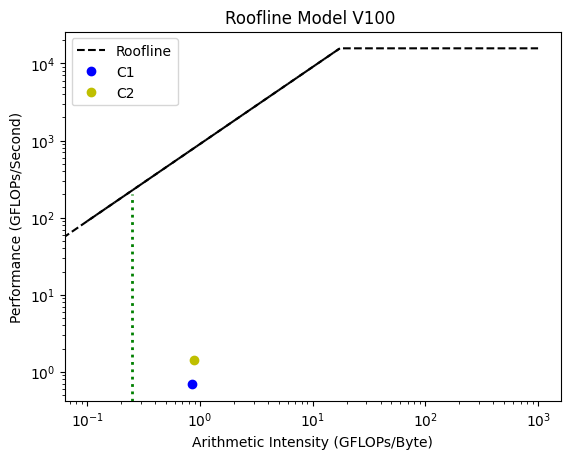

In [31]:

# Generate the data points for the roofline model
x_roof = np.arange(0.1, 1000)
y_roof = np.minimum(peak_perf, mem_bandwidth * x_roof)

# Plot the roofline model
plt.loglog(x_roof, y_roof, color='black', linestyle='--')

# Plot roofline model
plt.plot(ai_range, perf_range, 'k--', label='Roofline')
plt.xlabel('Arithmetic Intensity (GFLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/Second)')
plt.title('Roofline Model V100 ')

# Define benchmark data
benchmarks = [('C1',rfsp[0],rfsp[1]),('C2',rfmp[0],rfmp[1])]

# Plot benchmark points
colors = ['bo','yo']
for i, (label, bw, perf) in enumerate(benchmarks):
    # Check if point overlaps with previous points
    ai = perf/bw
    overlap = False
    for j in range(i):
        if abs(ai - benchmarks[j][2]) < 0.05 and abs(perf - benchmarks[j][1]) < 5:
            overlap = True
            break
    if not overlap:
        plt.plot(ai, perf, colors[i], label=label)
plt.vlines(x=0.25, ymin=0, ymax=200, colors='green', ls=':', lw=2)
# Add legend
plt.legend()

# Show plot
plt.show()